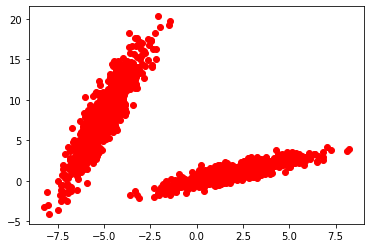

In [31]:
import math as m
import numpy as np
from matplotlib import pyplot as plt


# Extracting data from text files
file1 = open(r"linearly_seperable_data\Class1.txt","r+")
L1 = file1.readlines()
list1=[]
for line in L1:
        data=(line.strip())
        first,sec=data.split("\t")
        list1.append((float(first),float(sec)))
file2 = open(r"linearly_seperable_data\Class2.txt","r+")
L2 = file2.readlines()
list2=[]
for line in L2:
        data=(line.strip())
        first,sec=data.split("\t")
        list2.append((float(first),float(sec)))
A=list1+list2
plt.scatter(*zip(*A), color = 'red', label = 'Total points')

In [32]:
A=np.asarray(A)
samples,features=A.shape
print("No of samples, feaures are,\n",samples,features)

No of samples, feaures are,
 2000 2


In [33]:
Y = np.zeros(len(A))
Y.shape

(2000,)

In [34]:
for i in range(1000):
    Y[i]=1
for i in range(1000,samples):
    Y[i]=-1
    
def cal(X,W):
    output=W[0]*X[0]+W[1]*X[1]+W[2]*X[2]
    if output>=0:
        return 1
    else:
        return -1
def train(A,Y):
    samples,features=A.shape   
    A = np.hstack((np.ones((samples,1)), A))
    W = np.random.rand(features+1).reshape((-1,1))
    misclassified=True
    iter=0
    while misclassified!=False:
        misclassified=False
        iter=iter+1
        
        for index,x in enumerate(A):
            out=cal(x,W)
            if out!=Y[index]:
                misclassified=True
                W=W+(Y[index]*x.reshape((-1,1)))
        if(iter==10000):
            break
    print("Number of iteration: ",iter)
    return W

def predict(W,x):
    print(x.shape)
    Z=np.zeros(len(x))
    for i in range(len(x)):
        cal=W[0]+W[1]*x[i][0]+W[2]*x[i][1]
        if(cal>=0):
            Z[i]=1
        else:
            Z[i]=-1
    return Z

def plot_decision_boundry(X,Y,w):
    h = 0.02
    cmap='Paired_r'
    x_min, x_max = X[:,0].min() - 100*h, X[:,0].max() + 100*h    
    y_min, y_max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = predict(w,np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print("size of z",Z.shape)
    plt.figure(figsize=(8,8))
    c = ('red','green','yellow')
    plt.contourf(xx, yy, Z, alpha=0.25, colors = c)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend

Number of iteration:  6
(1454306, 2)
size of z (1423, 1022)


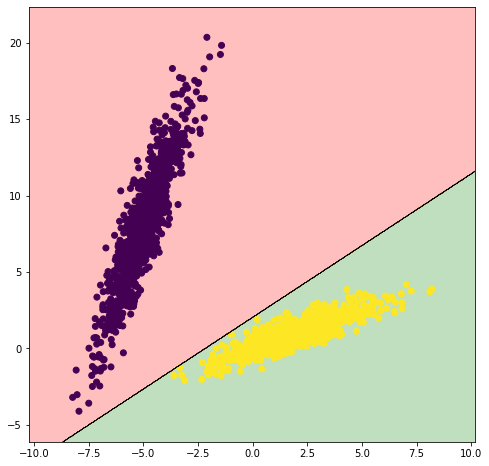

In [35]:
W = train(A,Y)
plot_decision_boundry(A,Y,W)

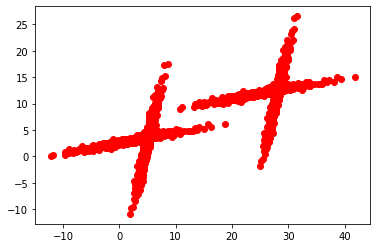

In [37]:
#2

# Extracting data from text files
file1 = open(r"non_linearly_seperable_data\Class1.txt","r+")
L1 = file1.readlines()
list1=[]
for line in L1:
        data=(line.strip())
        first,sec=data.split("\t")
        list1.append((float(first),float(sec)))
file2 = open(r"non_linearly_seperable_data\Class2.txt","r+")
L2 = file2.readlines()
list2=[]
for line in L2:
        data=(line.strip())
        first,sec=data.split("\t")
        list2.append((float(first),float(sec)))
A=list1+list2

plt.scatter(*zip(*A), color = 'red', label = 'Total points')

In [38]:
A=np.asarray(A)
samples,features=A.shape
print("No of samples, feaures are,\n",samples,features)

No of samples, feaures are,
 2000 2


In [39]:
Y = np.zeros(len(A))
Y.shape

(2000,)

In [40]:
for i in range(1000):
    Y[i]=1
for i in range(1000,samples):
    Y[i]=-1


Number of iteration:  10000
(6014600, 2)
size of z (2074, 2900)


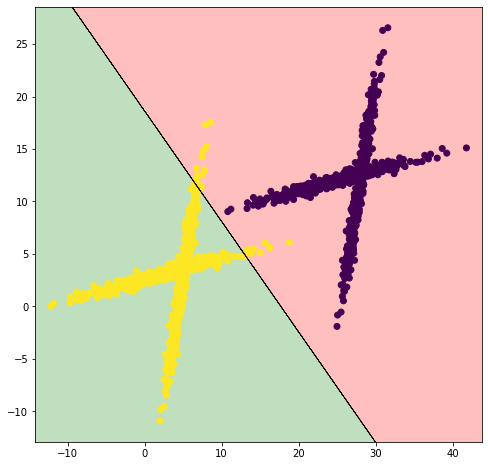

In [41]:
W = train(A,Y)
plot_decision_boundry(A,Y,W)